C:\nlp-homework\THUCNews
['科技' '体育' '时政' '股票' '娱乐' '教育' '家居' '财经' '房产' '社会' '游戏' '彩票' '星座' '时尚']
['科技', '体育', '时政', '股票', '娱乐', '教育', '家居', '财经', '房产', '社会', '游戏', '彩票', '星座', '时尚']
不同类别的标签数量和占比如下：
    ID   Count     Ratio
科技   0  162245  0.194874
体育   1  130982  0.157401
时政   2   62867  0.075455
股票   3  153949  0.184670
娱乐   4   92228  0.110792
教育   5   41680  0.050159
家居   6   32363  0.038976
财经   7   36963  0.044372
房产   8   19922  0.023981
社会   9   50541  0.060820
游戏  10   24283  0.029152
彩票  11    7598  0.009077
星座  12    3515  0.004281
时尚  13   13335  0.015990
    ID   Count     Ratio      Weight  Weight Norm
科技   0  162245  0.194874    5.131522     0.008467
体育   1  130982  0.157401    6.353183     0.010482
时政   2   62867  0.075455   13.252862     0.021867
股票   3  153949  0.184670    5.415058     0.008935
娱乐   4   92228  0.110792    9.025897     0.014892
教育   5   41680  0.050159   19.936703     0.032895
家居   6   32363  0.038976   25.657085     0.042333
财经   7   36963  0.044372   

findfont: Generic family 'sans-serif' not found because none of the following families were found: FZSongYi-Z13S
findfont: Generic family 'sans-serif' not found because none of the following families were found: FZSongYi-Z13S
C:\Users\22826\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 31185 (\N{CJK UNIFIED IDEOGRAPH-79D1}) missing from current font.
  func(*args, **kwargs)
C:\Users\22826\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25216 (\N{CJK UNIFIED IDEOGRAPH-6280}) missing from current font.
  func(*args, **kwargs)
findfont: Generic family 'sans-serif' not found because none of the following families were found: FZSongYi-Z13S
C:\Users\22826\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from current font.
  func(*args, **kwargs)
C:\Users\22826\AppData\Local\Programs

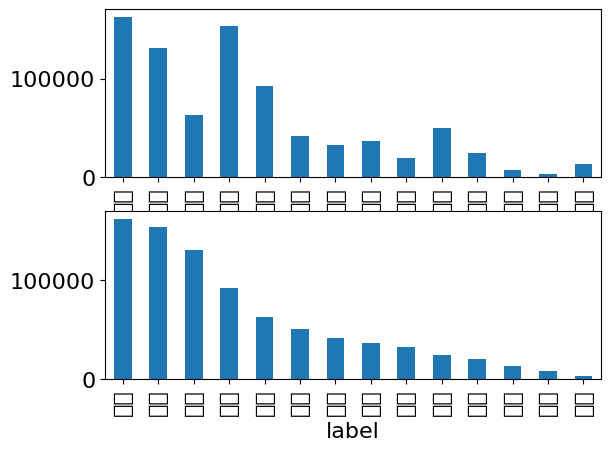

In [5]:
# 进入比赛数据集存放目录
%cd THUCNews

# 使用pandas读取数据集
import pandas as pd
train = pd.read_table('train.txt', sep='\t',header=None)  # 训练集
dev = pd.read_table('dev.txt', sep='\t',header=None)      # 验证集（官方已经划分的）
test = pd.read_table('test.txt', sep='\t',header=None)    # 测试集
# 对数据集手动添加列名
train.columns = ["text_a",'label']
dev.columns = ["text_a",'label']
test.columns = ["text_a"]
# 拼接训练和验证集，进行统计分析
total = pd.concat([train,dev],axis=0)
print(total.label.unique())
print(total.label.unique().tolist())
['科技' '体育' '时政' '股票' '娱乐' '教育' '家居' '财经' '房产' '社会' '游戏' '彩票' '星座' '时尚']
['科技', '体育', '时政', '股票', '娱乐', '教育', '家居', '财经', '房产', '社会', '游戏', '彩票', '星座', '时尚']
# 拼接训练和验证集，进行统计分析
total = pd.concat([train,dev],axis=0)
print("不同类别的标签数量和占比如下：")
# 得到不同类别的标签数量和占比，按照降序排列，数据类型是“pandas.core.series.Series”
series_Count_desc = total['label'].value_counts()
series_Ratio_desc = (train['label'].value_counts())/sum(train['label'].value_counts())
# 合并不同类别的标签数量和占比，仍然是降序排列
series_Info_desc = pd.concat([series_Count_desc,series_Ratio_desc],axis=1)
# print(series_Info_desc)
# print(series_Info_desc.keys())
# 定义要进行分类的类别
label_list = total.label.unique().tolist()
# 建立由分类标签到ID的映射表
Label_ID_map = {Val:ID for ID,Val in enumerate(label_list)}
series_Info_data = pd.Series(Label_ID_map)
# print(series_Info_data.keys())
# 按照ID的顺序，重新排列不同类别的标签数量和占比
df_Info_data = pd.concat([series_Info_data,series_Info_desc],axis=1)
# 设置列名称
df_Info_data.columns=['ID','Count','Ratio']
print(df_Info_data)
# print(type(df_Info_data))
#计算损失函数不同类型的权重：占有比例的倒数，需要进行归一化
series_Recip_desc = 1/series_Ratio_desc#倒数
series_Weight_desc = series_Recip_desc
series_WeightNorm_desc = series_Recip_desc/sum(series_Recip_desc)#归一化
# print(series_Recip_desc)
# print(series_Weight_desc)
#合并到不同类别的标签数量和占比种
df_Info_data = pd.concat([df_Info_data,series_Weight_desc],axis=1)
df_Info_data = pd.concat([df_Info_data,series_WeightNorm_desc],axis=1)
# 设置列名称
df_Info_data.columns=['ID','Count','Ratio','Weight','Weight Norm']
print(df_Info_data)
   
# 全局设置解决matplotlib中文显示错误的问题，参考：https://aistudio.baidu.com/aistudio/projectdetail/1658980
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# 设置显示中文
matplotlib.rcParams['font.sans-serif'] = ['FZSongYi-Z13S'] # 指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
# 设置字体大小
matplotlib.rcParams['font.size'] = 16

# 绘制不同类型标签的分布情况(按照ID升序排列)
plt.subplot2grid((2,2),(0,0),colspan=2)
df_Info_data['Count'].plot(kind='bar');
# 绘制不同类型标签的分布情况(按照样本数量降序排列)
plt.subplot2grid((2,2),(1,0),colspan=2)
series_Count_desc.plot(kind='bar');
# 统计“训练集+验证集”的长度信息
print("The length information of Train&&Dev is as follows:/n")
print(total['text_a'].map(len).describe())
# 统计“测试集”的长度信息
print("The length information of Test is as follows:/n")
print(test['text_a'].map(len).describe())
# 是否使用全部数据集（训练集+验证集）进行训练
useTotalData = False
# 是否使用伪标签进行训练
useFakeData = False
# 是否仅使用伪标签进行训练（增量学习）
useFakeOnly = False
if useTotalData == True:
    #使用全部数据集（训练集+验证集）进行训练
    train = pd.concat([train,dev],axis=0)
if useFakeData == True:
    #使用伪标签进行训练
    train = pd.concat([train,fakeData1],axis=0)
if useFakeOnly == True:
    #仅使用伪标签进行训练（增量学习）
    train = fakeData1
# 保存处理后的数据集文件
train.to_csv('train.csv', sep='\t', index=False)  # 保存训练集，格式为text_a,label，以\t分隔开
dev.to_csv('dev.csv', sep='\t', index=False)      # 保存验证集，格式为text_a,label，以\t分隔开
test.to_csv('test.csv', sep='\t', index=False)    # 保存测试集，格式为text_a，以\t分隔开